# Data Preparation for Movies

Готовим данные для использования на моделях. В планах провести масштабирование, замену пропущенных значений, кодирование категорических значений и преобразование текстовых значений в их числовое представление через Bag of Words.

## Import Data

In [1]:
import pandas as pd

In [9]:
movies_dataset = pd.read_csv('./datasets/movies_dataset/movies_clear.csv')

## Familiarize with Data

Языки, теги, описание и название - столбцы со значениями, в которых есть текст.

Языки и статус - столбцы с категорическими значениями.

Сборы, бюджет и кол-во оценок - столбцы, которые нужно масштабировать.

In [3]:
movies_dataset.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[28, 12, 14, 878]",19995,"[1463, 2964, 3386, 3388, 3679, 3801, 9685, 984...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[289, 306, 444, 574]","['us', 'gb']",2009-12-10,2787965087,162.0,"['en', 'es']",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[12, 14, 28]",285,"[270, 726, 911, 1319, 2038, 2052, 2580, 2660, ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[2, 130, 19936]",['us'],2007-05-19,961000000,169.0,['en'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[28, 12, 80]",206647,"[470, 818, 4289, 9663, 145556, 156095, 158431]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[5, 10761, 2469434]","['gb', 'us']",2015-10-26,880674609,148.0,"['fr', 'en', 'es', 'it', 'de']",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[28, 80, 18, 53]",49026,"[849, 853, 949, 1308, 1437, 3051, 3562, 6969, ...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[923, 6194, 9993, 9996]",['us'],2012-07-16,1084939099,165.0,['en'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[28, 12, 878]",49529,"[818, 839, 1456, 3801, 7376, 9951, 10028, 1053...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[2],['us'],2012-03-07,284139100,132.0,['en'],Released,"Lost in our world, found in another.",John Carter,6.1,2124


В столбце `runtime` берем среднее значение.

Проблема с `tagline`. 

Это очень важный столбец и просто удалять его не хочется. 

На среднее значение изменить не получится.

Удалять строки тоже жалко, так как данных и так мало.

In [4]:
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

## Imputing Data

Перед тем, как проводить операции с данными, нужно очистить их от пропущенных значений.

In [5]:
import numpy as np
from time import time
from sklearn.impute import KNNImputer, SimpleImputer

Для фильмов используем ту же стратегию, что и для игр. (хотя, на самом деле, наоборот)

In [6]:
movies_dataset = movies_dataset.fillna(movies_dataset.mode().iloc[0])

## Replace Categorical Values

Теперь нужно кодировать категорические значения. 

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
# так как нам не важно, каким значением будет число
# лишь бы оно было разное, выбираем самый простой кодировщик
encoder = OrdinalEncoder()

In [9]:
# тут тоже, что и с прошлым набором
cat_cols = ['original_language', 'status', 'spoken_languages', 'production_countries']

In [10]:
movies_dataset[cat_cols] = encoder.fit_transform(movies_dataset[cat_cols])

In [11]:
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   float64
 5   original_title        4803 non-null   object 
 6   overview              4803 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   float64
 10  release_date          4803 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4803 non-null   float64
 13  spoken_languages      4803 non-null   float64
 14  status                4803 non-null   float64
 15  tagline              

## Converting Time Data into Different Columns

Все наборы данных содержат в себе необработанные столбцы с выходом того или иного объекта.

In [12]:
import DataPreparation as dp

In [13]:
cols = ['release_year', 'release_day','release_month']

In [14]:
splitted_data = movies_dataset.release_date.str.split('-')

In [15]:
date_cols = dp.date_to_cols(splitted_data, cols=cols)

In [16]:
movies_dataset[cols] = date_cols

In [17]:
del movies_dataset['release_date']

In [18]:
movies_dataset.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,release_day,release_month
0,237000000,"[28, 12, 14, 878]",19995,"[1463, 2964, 3386, 3388, 3679, 3801, 9685, 984...",7.0,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[289, 306, 444, 574]",439.0,...,162.0,178.0,1.0,Enter the World of Pandora.,Avatar,7.2,11800,2009,12,10
1,300000000,"[12, 14, 28]",285,"[270, 726, 911, 1319, 2038, 2052, 2580, 2660, ...",7.0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[2, 130, 19936]",464.0,...,169.0,382.0,1.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19
2,245000000,"[28, 12, 80]",206647,"[470, 818, 4289, 9663, 145556, 156095, 158431]",7.0,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[5, 10761, 2469434]",298.0,...,148.0,402.0,1.0,A Plan No One Escapes,Spectre,6.3,4466,2015,10,26
3,250000000,"[28, 80, 18, 53]",49026,"[849, 853, 949, 1308, 1437, 3051, 3562, 6969, ...",7.0,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[923, 6194, 9993, 9996]",464.0,...,165.0,382.0,1.0,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,7,16
4,260000000,"[28, 12, 878]",49529,"[818, 839, 1456, 3801, 7376, 9951, 10028, 1053...",7.0,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[2],464.0,...,132.0,382.0,1.0,"Lost in our world, found in another.",John Carter,6.1,2124,2012,3,7


### Implement Bag of Words on Dataset

In [10]:
ids = movies_dataset.index

In [11]:
names = movies_dataset.title

In [12]:
mov_id_name_dict = dict(zip(ids, names))
mov_name_id_dict = dict(zip(names, ids))

In [22]:
del movies_dataset['title']

In [23]:
del movies_dataset['id']

In [24]:
text_cols = ['genres', 'keywords', 'overview', 'production_companies', 'tagline', 'original_title']

In [25]:
movies_dataset['text_features'] = dp.get_text_features(movies_dataset, text_cols)

In [26]:
movies_matrix = dp.text_to_nums.fit_transform(movies_dataset['text_features'])

[Pipeline] ..... (step 1 of 2) Processing TextToCounter, total= 2.3min
[Pipeline] .. (step 2 of 2) Processing CounterToFeature, total=   0.3s


In [27]:
text_cols.append('text_features')

In [28]:
for col in text_cols:
    del movies_dataset[col]

## Simple Data Visualization

`vote_average` выглядит так, как будто уже нормально распределен. `id` -  индекс. Все остальное - под нормализацию.

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'original_language'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'production_countries'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'spoken_languages'}>,
        <AxesSubplot:title={'center':'status'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'release_day'}>],
       [<AxesSubplot:title={'center':'release_month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

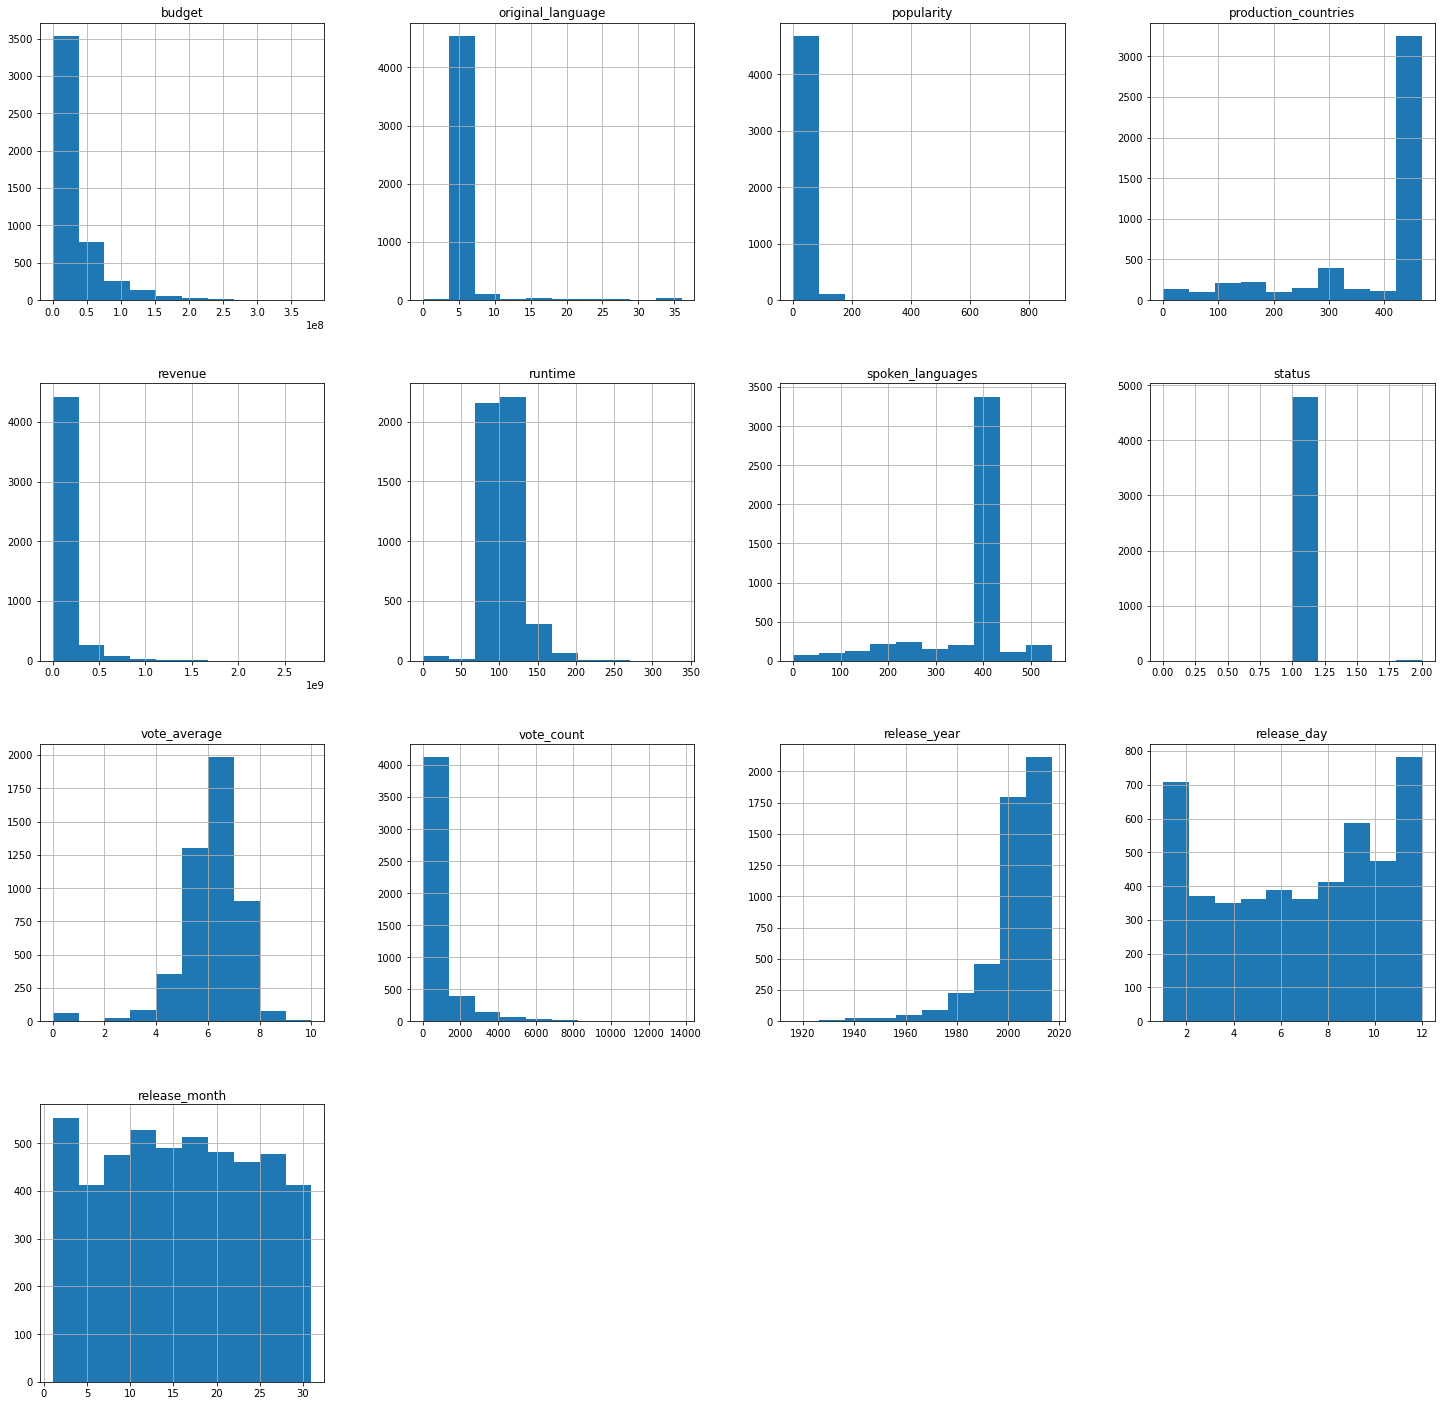

In [30]:
movies_dataset.hist(figsize=(25, 25))

А чо вы хотели от того, кто не шарит в статистике?

## Data Normalization

In [33]:
scaled_nums, cols = dp.implement_scalar(movies_dataset)

In [34]:
movies_dataset[cols] = scaled_nums

In [35]:
movies_dataset.head()

,budget,original_language,popularity,production_countries,revenue,runtime,spoken_languages,status,vote_average,vote_count,release_year,release_day,release_month
0,0.623684,0.194444,0.171815,0.938034,1.000000,0.479290,0.327808,0.5,0.72,0.858057,0.920792,1.000000,0.300000
1,0.789474,0.194444,0.158846,0.991453,0.344696,0.500000,0.703499,0.5,0.69,0.327225,0.900990,0.363636,0.600000
2,0.644737,0.194444,0.122635,0.636752,0.315884,0.437870,0.740331,0.5,0.63,0.324753,0.980198,0.818182,0.833333
3,0.657895,0.194444,0.128272,0.991453,0.389151,0.488166,0.703499,0.5,0.76,0.662158,0.950495,0.545455,0.500000
4,0.684211,0.194444,0.050169,0.991453,0.101916,0.390533,0.703499,0.5,0.61,0.154450,0.950495,0.181818,0.200000


# Getting Recommendations

In [2]:
import GetSimilars as gs

In [3]:
movies_num_matrix = movies_dataset.to_numpy()

In [5]:
full_cs = gs.get_cosine_sim(movies_num_matrix.to_numpy(), movies_matrix.to_numpy())

In [25]:
similaries = gs.get_similar(full_cs, "Spectre", mov_id_name_dict, mov_name_id_dict)

In [26]:
similaries

['The Dark Knight Rises',
 "Pirates of the Caribbean: At World's End",
 'Tangled',
 'John Carter',
 'Spider-Man 3',
 'Avengers: Age of Ultron',
 'Batman v Superman: Dawn of Justice']

In [53]:
movies_text_matrix = pd.DataFrame(movies_matrix.toarray())

In [58]:
movies_dataset.to_csv('C:/Users/ASDW/Python/Projects/Recosys 2.0/datasets/movies_dataset/movies_num_matrix')

In [56]:
movies_text_matrix.to_csv('C:/Users/ASDW/Python/Projects/Recosys 2.0/datasets/movies_dataset/movies_text_matrix.csv')